## Esercitazione 8  del    23 Aprile 2024


## Condizionamento del problema della soluzione di un sistema lineare

In [8]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import matplotlib.pyplot as plt
import sympy as sym
from SolveTriangular import *
import sys, os

sys.path.append(os.path.abspath('../Scheletri'))

import Schel_FULL as sf

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [9]:
x = np.arange(1.0, 7.0, 1.0)

V = np.vander(x, increasing=True)

condV = npl.norm(npl.inv(V), np.inf)*npl.norm(V, np.inf)
print("Indice di condizionamento di V = :", condV)

b = np.sum(V, 1)
x = npl.solve(V, b)

print("Soluzione = ", x)

bpert = b.copy()
bpert[0] += 0.025

xpert = npl.solve(V, bpert)

print("Soluzione con b perturbato = ", xpert)

err_rel_b = npl.norm(bpert - b, np.inf)/npl.norm(b, np.inf)
err_rel_x = npl.norm(xpert - x, np.inf)/npl.norm(x, np.inf)
print("Errore relativo termine noto in percentuale = ", err_rel_b*100, " %")
print("Errore relativo soluzione in percentuale = ", err_rel_x*100, " %")


Indice di condizionamento di V = : 1204321.0666666436
Soluzione =  [1. 1. 1. 1. 1. 1.]
Soluzione con b perturbato =  [1.15       0.7825     1.12083333 0.96770833 1.00416667 0.99979167]
Errore relativo termine noto in percentuale =  0.0002679241238881187  %
Errore relativo soluzione in percentuale =  21.74999999906332  %


## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [10]:
A = np.array([
    [6,63,662.2],
    [63, 662.2, 6967.8],
    [662.2, 6967.8, 73393.5664]
])

b = np.array([1.1, 2.33, 1.7]).reshape(3, 1)

x = spl.solve(A, b)

print("Condizionamento di A = ", npl.cond(A, np.inf))

Apert = A.copy()
Apert[0][0] += 0.01

xpert = spl.solve(Apert, b)


err_rel_A = npl.norm(Apert - A, np.inf)/npl.norm(b, np.inf)
err_rel_x = npl.norm(xpert - x, np.inf)/npl.norm(x, np.inf)
print("Errore relativo matrice in percentuale = ", err_rel_A*100, " %")
print("Errore relativo soluzione in percentuale = ", err_rel_x*100, " %")

Condizionamento di A =  19753018830.04029
Errore relativo matrice in percentuale =  0.429184549356214  %
Errore relativo soluzione in percentuale =  99.95081547933965  %


## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [11]:
H = spl.hilbert(4)

b = np.ones((4, 1))
print("Condizionamento di H = ", npl.cond(H, np.inf))

x = spl.solve(H, b)

p = np.array([0.01 * ((-1)**i) for i in range(4)]).reshape(4,1)

bpert = b.copy()
bpert += p

xpert = spl.solve(H, bpert)

err_rel_b = npl.norm(p, np.inf)/npl.norm(b, np.inf)
err_rel_x = npl.norm(xpert - x, np.inf)/npl.norm(x, np.inf)
print("Errore relativo termine noto in percentuale = ", err_rel_b*100, " %")
print("Errore relativo soluzione in percentuale = ", err_rel_x*100, " %")

Condizionamento di H =  28374.99999999729
Errore relativo termine noto in percentuale =  1.0  %
Errore relativo soluzione in percentuale =  75.6666666666672  %


## Metodi diretti per la soluzione numerica di un sistema lineare

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [12]:
def LUsolve(P,L,U,b):
    x, flag = Lsolve(L, P@b)
    y, flag = Usolve(U, x)
    return y

## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [13]:
def solve_nsis(A,B):
    sol_matrix = np.zeros_like(B)
    PT, L, U = spl.lu(A)
    P = PT.T.copy()
    for j in range(B.shape[1]):
        col = LUsolve(P,L,U,B[:, j])
        sol_matrix[:, j] = col.reshape(B.shape[1],)
    return sol_matrix

A = np.array([
    [3,5,7],
    [2,3,4],
    [5,9,11]
])

A1 = np.array([
    [1,2,3,4],
    [2,-4,6,8],
    [-1,-2,-3,-1],
    [5,7,0,1]
])

print(solve_nsis(A, np.eye(A.shape[0])))
print(npl.inv(A))

[[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
[[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]


## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [14]:
PT, L, U = spl.lu(A)

rank = np.count_nonzero(np.diag(L))

print("Rango della matrice con LU = ", rank)
print("Rango della matrice con numpy = ", npl.matrix_rank(A))

Rango della matrice con LU =  3
Rango della matrice con numpy =  3


## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

NB: per il calcolo della matrice di Hankel utilizzare la function 

def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

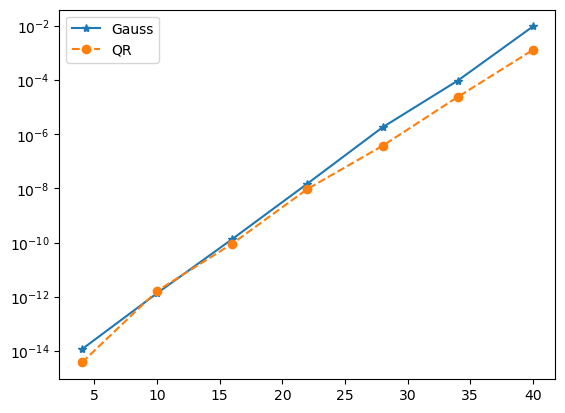

In [32]:
def hankel(n):
    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

n_values = np.arange(4, 41, 6)

err_rel_lu = []
err_rel_qr = []

for n in n_values:
    
    A = hankel(n)
    b = np.sum(A, 1)
    xesatta = np.ones_like(b)
    PT, L, U = spl.lu(A)
    P = PT.T.copy()
    y,flag = Lsolve(L, P@b)
    x,flag = Usolve(U, y)
    err_rel_lu.append(npl.norm(x-xesatta, 2)/npl.norm(xesatta, 2))

    Q, R = spl.qr(A)
    h = Q.T@b
    x, flag = Usolve(R, h)
    err_rel_qr.append(npl.norm(x-xesatta, 2)/npl.norm(xesatta, 2))
    #x = sf.LUsolve(P,L,U,b)
    

plt.semilogy(n_values, err_rel_lu, '*-')
plt.semilogy(n_values, err_rel_qr, 'o--')
plt.legend(['Gauss','QR'])
plt.show()


## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

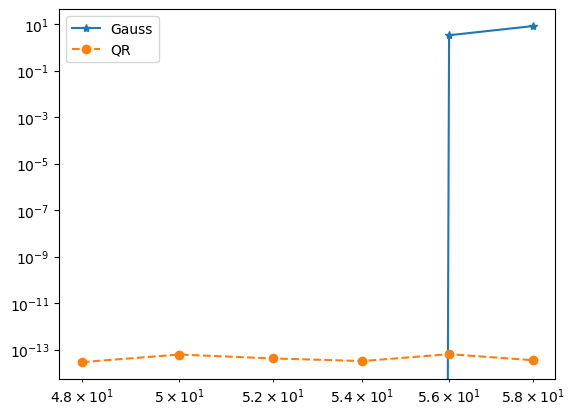

In [37]:
def matrix(n):
    A=np.zeros((n,n),dtype=float)
    for i in range(n):
        for j in range(n):
            if i == j or j == n-1:
                A[i, j] = 1
            elif i > j:
                A[i,j] = -1
    return A
            


n_values = np.arange(48, 59, 2)

err_rel_lu = []
err_rel_qr = []

for n in n_values:
    
    A = matrix(n)
    b = np.sum(A, 1)
    xesatta = np.ones_like(b)
    PT, L, U = spl.lu(A)
    P = PT.T.copy()
    y,flag = Lsolve(L, P@b)
    x,flag = Usolve(U, y)
    err_rel_lu.append(npl.norm(x-xesatta, 2)/npl.norm(xesatta, 2))

    Q, R = spl.qr(A)
    h = Q.T@b
    x, flag = Usolve(R, h)
    err_rel_qr.append(npl.norm(x-xesatta, 2)/npl.norm(xesatta, 2))
    #x = sf.LUsolve(P,L,U,b)
    

plt.loglog(n_values, err_rel_lu, '*-',n_values, err_rel_qr, 'o--')
plt.legend(['Gauss','QR'])
plt.show()


## Metodi iterativi di Jacobi, Gauss-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

## Esercizio 9
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0]

raggio spettrale jacobi 0.5586853131416272
raggio spettrale Gauss-Seidel  0.31311214554257477
raggio spettrale jacobi 1.3748593749588482
raggio spettrale Gauss-Seidel  6.071428571428572
raggio spettrale jacobi 0.5287229642709426
raggio spettrale Gauss-Seidel  2.8147497671065588e+16


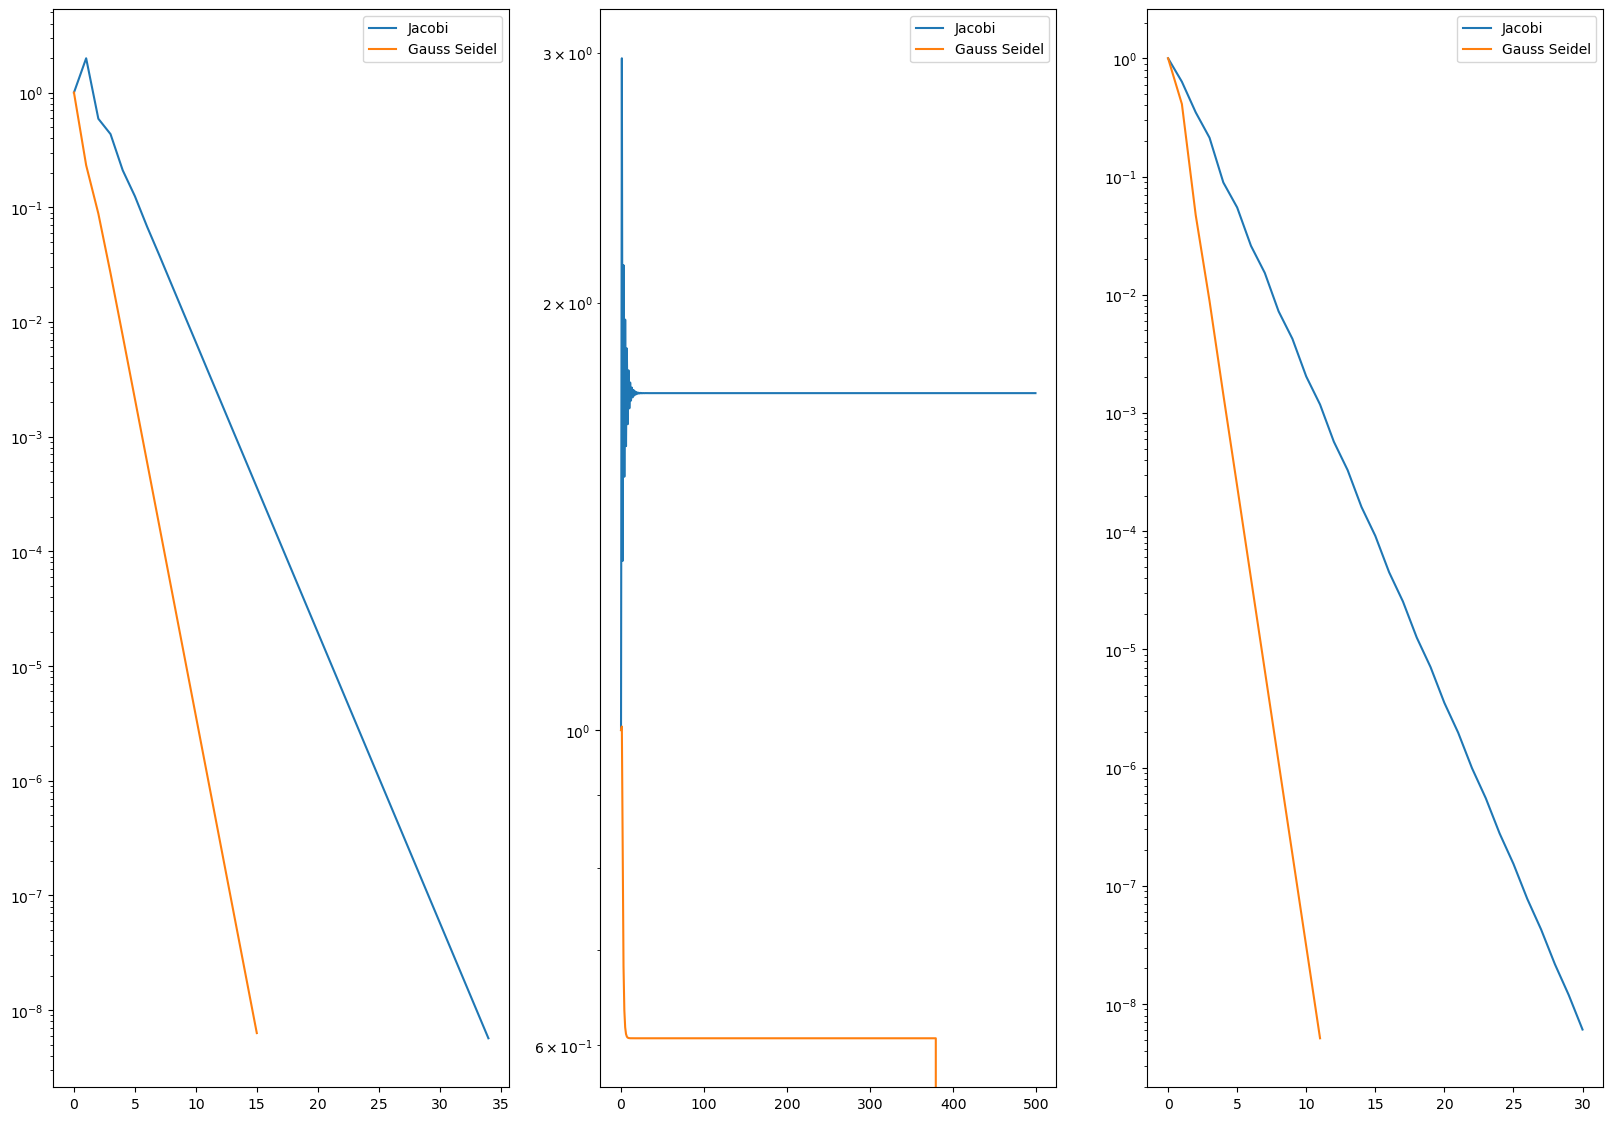

In [58]:
A1=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
A2=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
A3=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

matrices = [A1, A2, A3]

toll = 1e-8
it_max = 500

fig, ax = plt.subplots(1, 3, figsize= (20, 14))

for i in range(len(matrices)):
    n=matrices[i].shape[0]
    x0 = np.zeros(matrices[i].shape[0]).reshape(n,1)
    b = np.sum(matrices[i], 1).reshape(n,1)
    sol_jac, numit_jac, err_vec_jac = sf.jacobi(matrices[i],b,x0,toll, it_max)
    sol_gs, numit_gs, err_vec_gs = sf.gauss_seidel(matrices[i],b,x0,toll,it_max)

    ax[i].semilogy(np.arange(numit_jac), err_vec_jac)


    ax[i].semilogy(np.arange(numit_gs), err_vec_gs)
    ax[i].legend(["Jacobi ", "Gauss Seidel"])



## Esercizio 10
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

raggio spettrale jacobi 0.8451732757464308
raggio spettrale Gauss-Seidel  2.071787712109766
raggio spettrale Gauss-Seidel SOR  0.5522789194477608


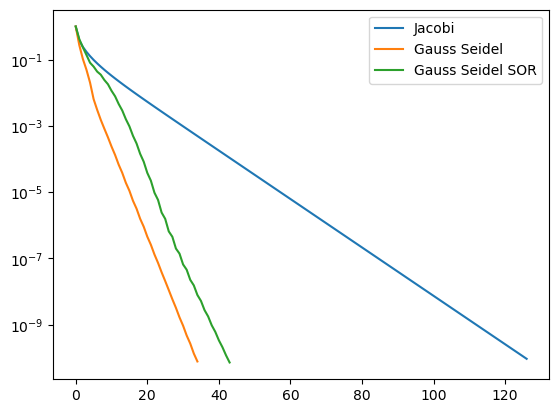

In [68]:
def creaPoisson(n):
    A = np.zeros((n,n))
    mainDiag = 4*np.ones(n)
    secondDiag = -np.ones(n-1)
    fourthDiag = -np.ones(n-3)
    return A + np.diag(mainDiag) + np.diag(secondDiag, 1) + np.diag(secondDiag, -1) + np.diag(fourthDiag, 3)+ np.diag(fourthDiag, -3)

n = 10
A = creaPoisson(n)
b = np.sum(A, 1).reshape(n,1)
x0 = np.zeros(n).reshape(n,1)
toll = 1e-10
it_max = 500



sol_jac, numit_jac, err_vec_jac = sf.jacobi(A,b,x0,toll, it_max)
sol_gs, numit_gs, err_vec_gs = sf.gauss_seidel(A,b,x0,toll,it_max)
sol_gs_sor, numit_gs_sor, err_vec_gs_sor = sf.gauss_seidel_sor(A,b,x0,toll,it_max, 1.45)

plt.semilogy(np.arange(numit_jac), err_vec_jac)


plt.semilogy(np.arange(numit_gs), err_vec_gs)

plt.semilogy(np.arange(numit_gs_sor), err_vec_gs_sor)
plt.legend(["Jacobi ", "Gauss Seidel", "Gauss Seidel SOR"])